In [1]:
# load libraries and set plot parameters
import matplotlib
matplotlib.use("Qt5Cairo")
import numpy as np
import pickle as pl
#import PrettyTable as pt

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

def figsize(scale,shrinky=1.0):
    #fig_width_pt = 469.75502 # For Nature           # Get this from LaTeX using \the\textwidth
    fig_width_pt = 518.74    # From Nature Guidelines of 183mm wide for images of double column
    inches_per_pt = 1.0/72.27                       # Convert pt to inch
    golden_mean = (np.sqrt(5.0)-1.0)/2.0            # Aesthetic ratio (you could change this)
    fig_width = fig_width_pt*inches_per_pt*scale    # width in inches
    fig_height = fig_width*golden_mean              # height in inches
    fig_size = [fig_width,fig_height*shrinky]
    return fig_size

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 75

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 7.20472222,7.20472222/((np.sqrt(5.0)-1.0)/2.0)
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 12
plt.rcParams['legend.fontsize'] = 12

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = "sans"
plt.rcParams['font.serif'] = "cm"
plt.rcParams['text.latex.preamble'] = r"\usepackage{subdepth}, \usepackage{type1cm}"



# I make my own newfig and savefig functions
def newfig(width,shrinky=1.0):
    plt.clf()
    fig = plt.figure(figsize=figsize(width,shrinky))
    ax = fig.add_subplot(111)
    return fig, ax
def newsubplots(width,nrows,ncols,sharex=False,sharey=False,shrinky=1.0):
    plt.clf()
    fig_width,fig_height=figsize(width/float(ncols))
    fig,ax = plt.subplots(nrows,ncols,figsize=[fig_width*float(ncols),shrinky*fig_height*float(nrows)],sharex=sharex,sharey=sharey)
    return fig, ax

def savefig(filename):
    #plt.savefig('{}.pgf'.format(filename))
    plt.savefig('{}.png'.format(filename))
    plt.savefig('{}.svg'.format(filename))
    #plt.savefig('{}.eps'.format(filename))
    plt.savefig('{}.pdf'.format(filename))
import deepdish.io as dd
import itertools
%matplotlib inline

In [7]:
data = dd.load('Beninca_B_min_max_to_Tmax.hdf5')
contvar = data['Tmax']

In [2]:
data = dd.load('Beninca_B_min_max_to_alpha.hdf5')
contvar = data['alpha']

(17.1, 22.8)

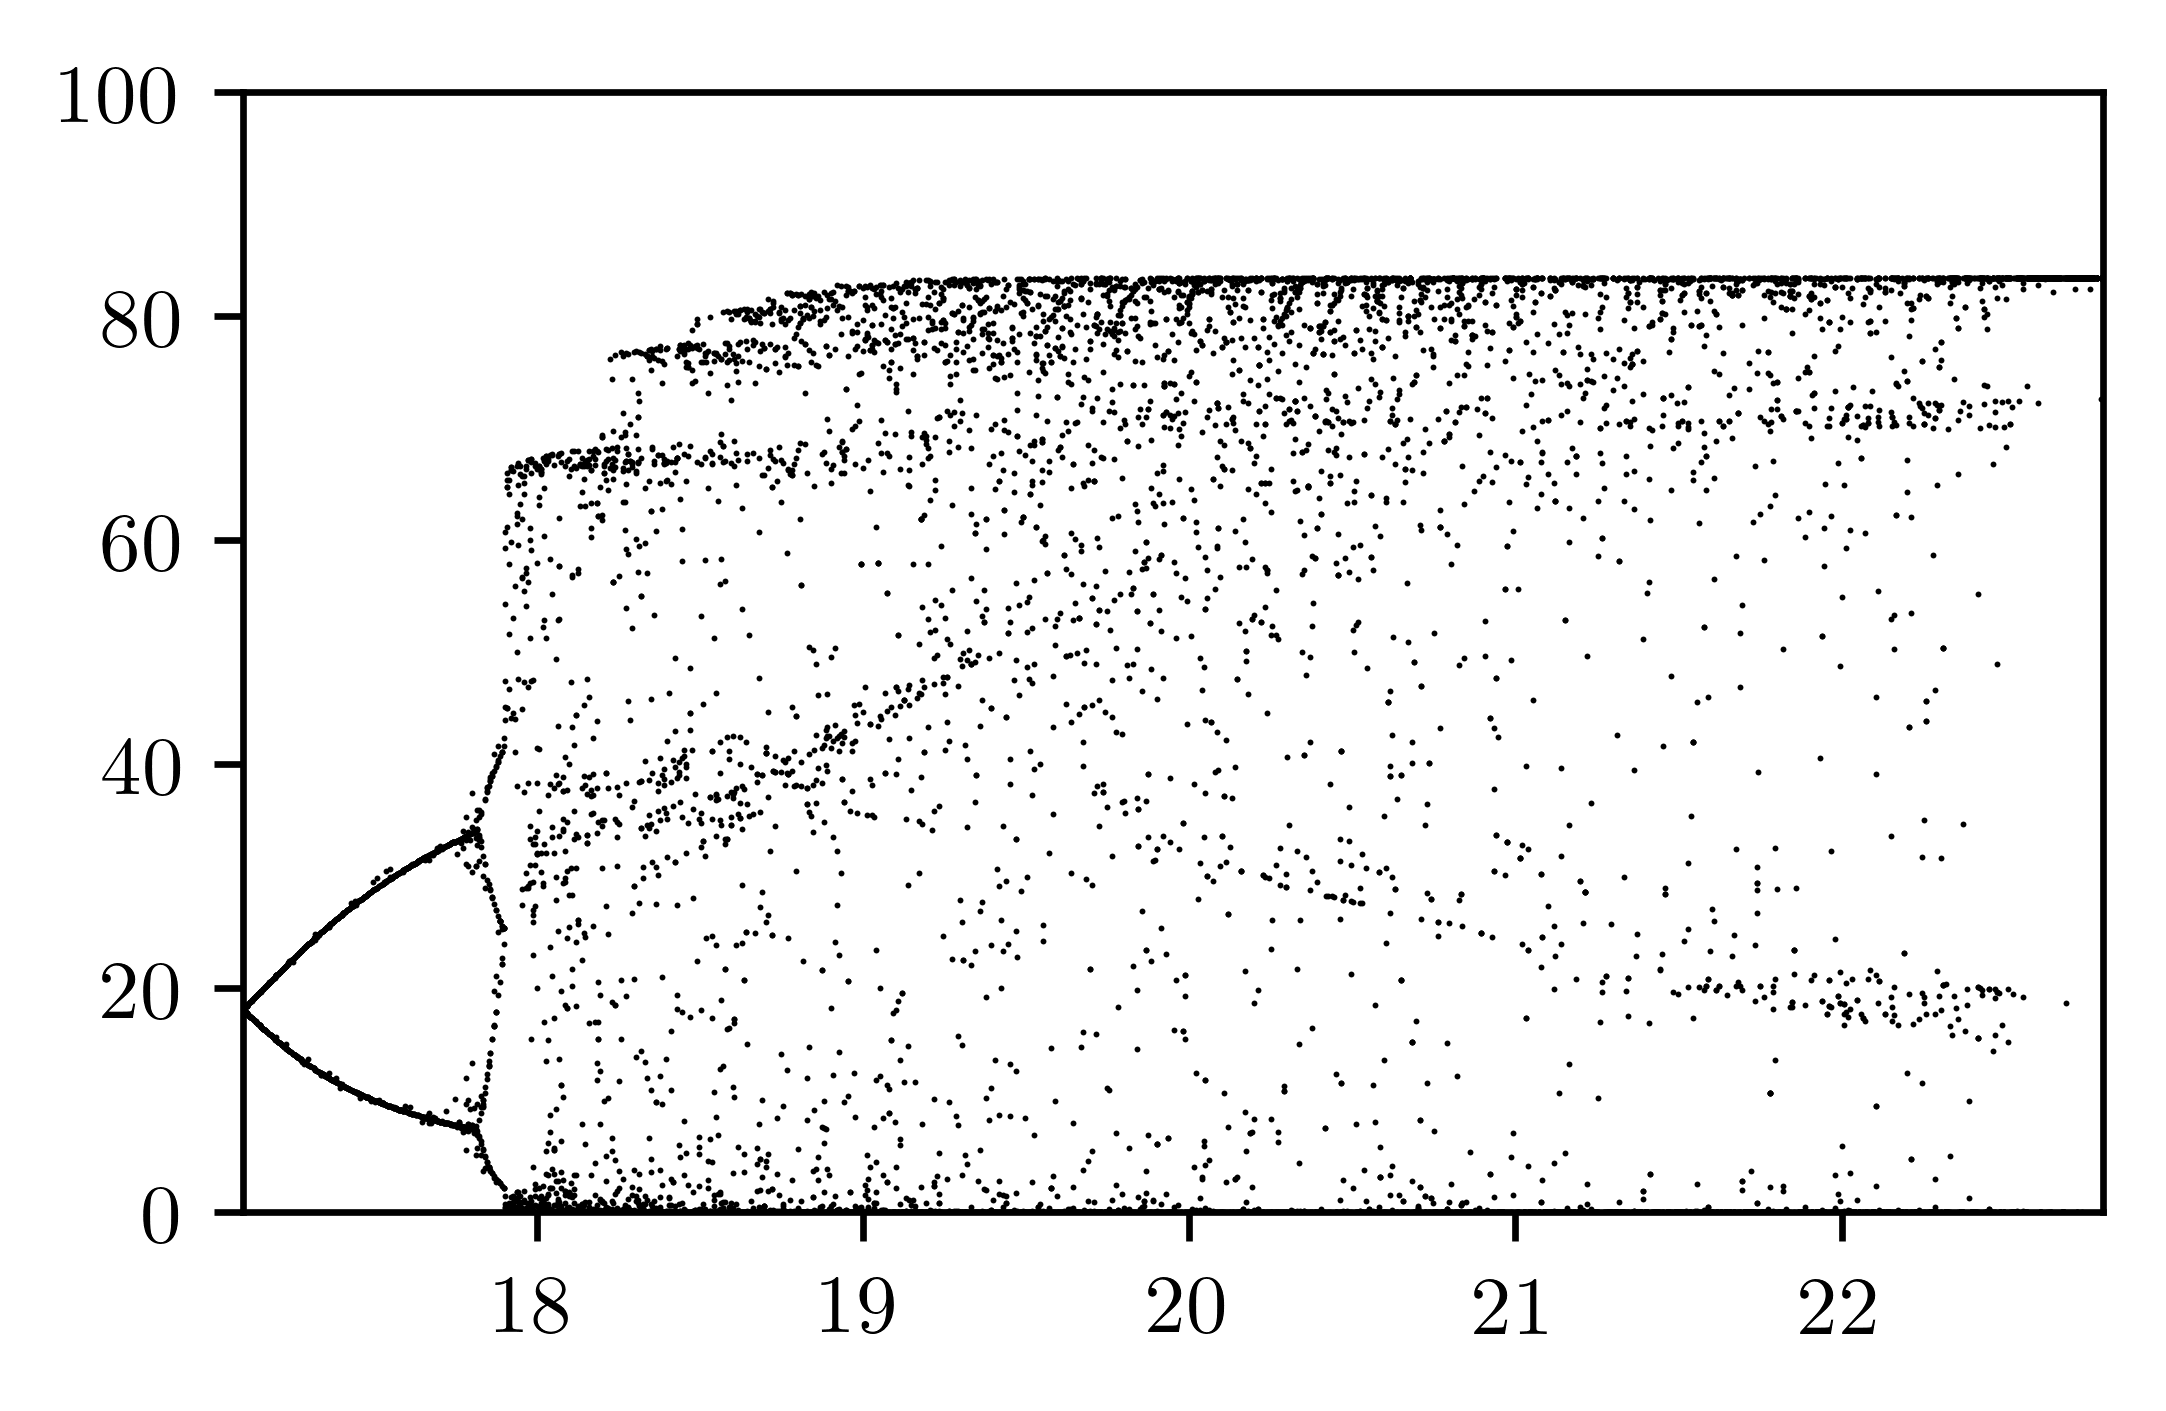

In [13]:
# Quick check of bifurcation
fig = plt.figure(figsize=(4,4/1.618),constrained_layout=False, dpi=600)
for i,var in enumerate(contvar):
    B = data['B'][i]
    var_arr = var*np.ones_like(B)
    plt.scatter(var_arr,B,s=2,marker=".",c='k', linewidths=0, rasterized=True)
plt.ylim([0,100])
plt.xlim([contvar[0],contvar[-1]])

In [ ]:
# Try to use gridspec
fig = plt.figure(figsize=(7.20472,7.20472),constrained_layout=False, dpi=2000)

gs1 = fig.add_gridspec(nrows=2, ncols=1, left=0.1, right=0.95,
                        wspace=0.05,hspace=0.4,top=0.95, bottom=0.7)
gs2 = fig.add_gridspec(nrows=5, ncols=2, left=0.09, right=0.98,
                        wspace=0.05,hspace=0.2,top= 0.6, bottom=0.07)
#gs = fig.add_gridspec(7, 2, wspace=0.1, hspace=0.2)

ax1  = fig.add_subplot(gs1[0, :])
ax2  = fig.add_subplot(gs1[1, :],sharey=ax1)
ax1.set_ylabel(r'$B\,[Kg/m^2]$')
ax2.set_ylabel(r'$B\,[Kg/m^2]$')
ax2.set_xlabel(r'$P_0\, [mm/year]$')
ax30 = fig.add_subplot(gs2[0, 0])
ax40 = fig.add_subplot(gs2[1, 0],sharex=ax30,sharey=ax30)
ax50 = fig.add_subplot(gs2[2, 0],sharex=ax30,sharey=ax30)
ax60 = fig.add_subplot(gs2[3, 0],sharex=ax30,sharey=ax30)
ax70 = fig.add_subplot(gs2[4, 0],sharex=ax30,sharey=ax30)
ax30.set_ylabel(r'$B\,[Kg/m^2]$')
ax40.set_ylabel(r'$B\,[Kg/m^2]$')
ax50.set_ylabel(r'$B\,[Kg/m^2]$')
ax60.set_ylabel(r'$B\,[Kg/m^2]$')
ax70.set_ylabel(r'$B\,[Kg/m^2]$')
ax70.set_xlabel(r'$T\,[years]$')
ax31 = fig.add_subplot(gs2[0, 1])
ax41 = fig.add_subplot(gs2[1, 1],sharex=ax31,sharey=ax31)
ax51 = fig.add_subplot(gs2[2, 1],sharex=ax31,sharey=ax31)
ax61 = fig.add_subplot(gs2[3, 1],sharex=ax31,sharey=ax31)
ax71 = fig.add_subplot(gs2[4, 1],sharex=ax31,sharey=ax31)
ax71.set_xlabel(r'$T\,[years]$')
plt.setp( ax31.get_yticklabels(), visible=False)
plt.setp( ax41.get_yticklabels(), visible=False)
plt.setp( ax51.get_yticklabels(), visible=False)
plt.setp( ax61.get_yticklabels(), visible=False)
plt.setp( ax71.get_yticklabels(), visible=False)
plt.setp( ax31.get_xticklabels(), visible=False)
plt.setp( ax41.get_xticklabels(), visible=False)
plt.setp( ax51.get_xticklabels(), visible=False)
plt.setp( ax61.get_xticklabels(), visible=False)
plt.setp( ax30.get_xticklabels(), visible=False)
plt.setp( ax40.get_xticklabels(), visible=False)
plt.setp( ax50.get_xticklabels(), visible=False)
plt.setp( ax60.get_xticklabels(), visible=False)

plt.savefig(path+'Figure2_dim.svg', dpi=1000)
plt.savefig(path+'Figure2_dim.pdf', dpi=1000)